In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import numpy as np
from   sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
df = pd.read_csv('glass.csv');
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
features = df.drop('Type', axis = 1);
y = df.Type;

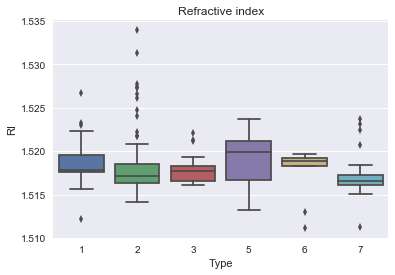

In [5]:
sns.boxplot(y = features.RI,x = y);
plt.title('Refractive index')

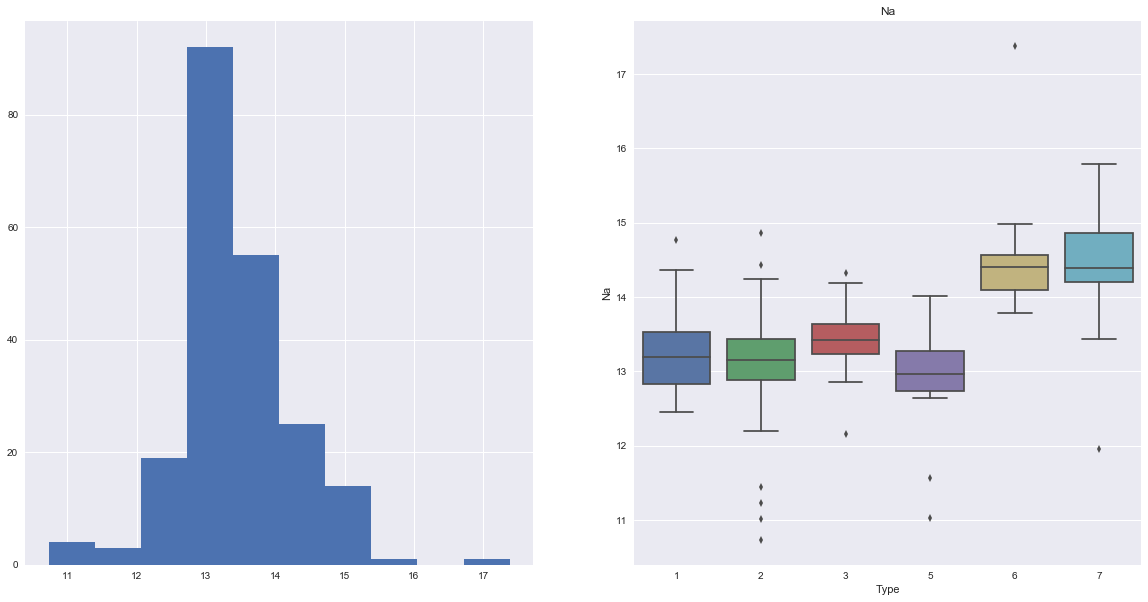

In [6]:
fName = 'Na'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("Na")

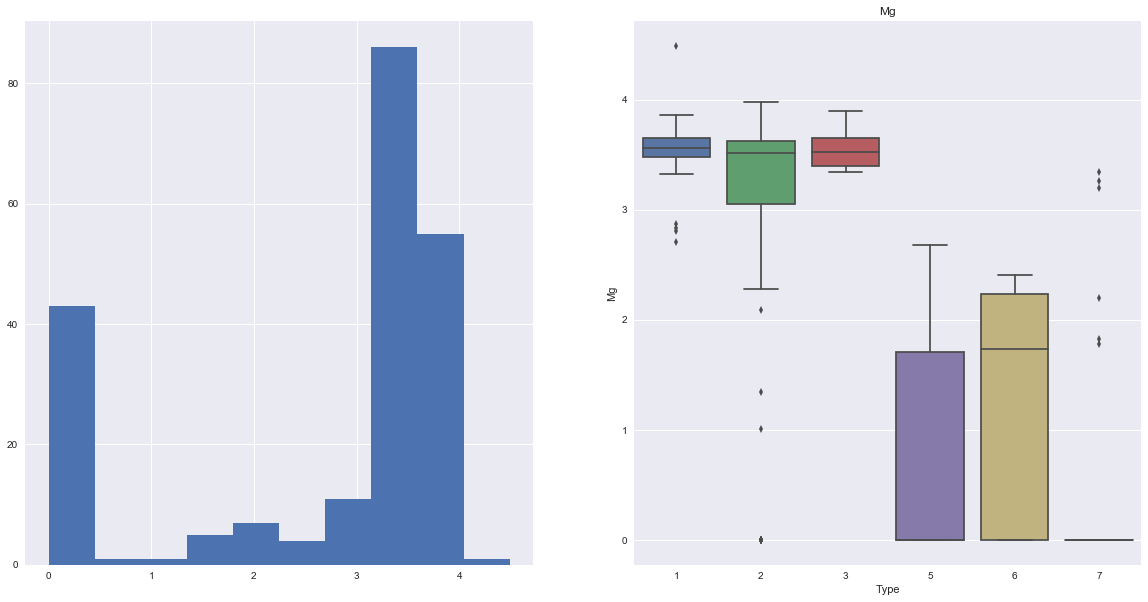

In [7]:
fName = 'Mg'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("Mg")

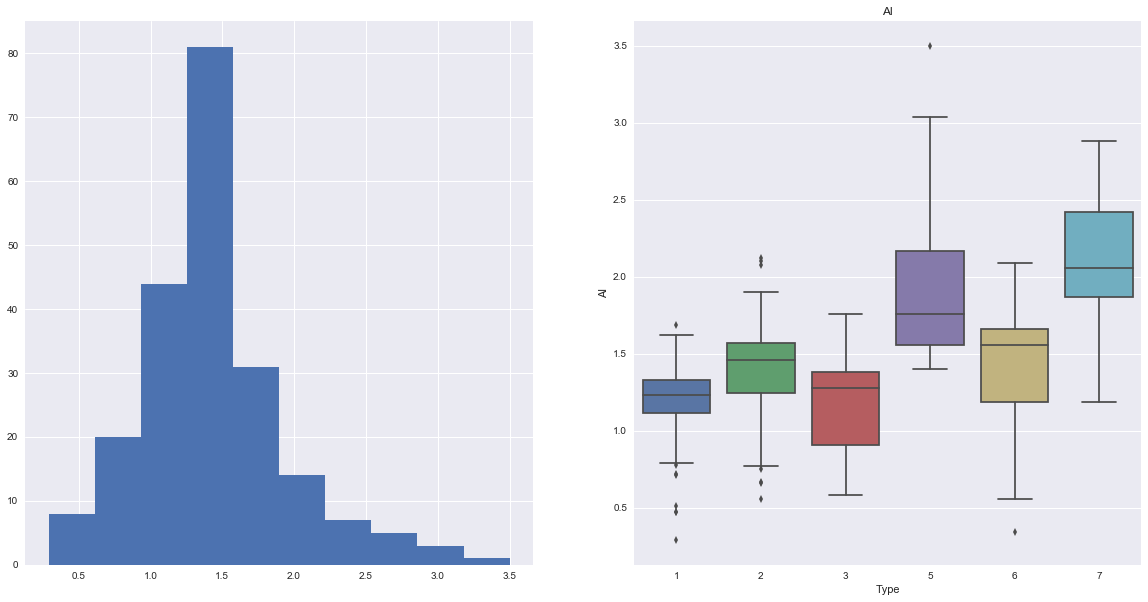

In [8]:
fName = 'Al'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("Al")

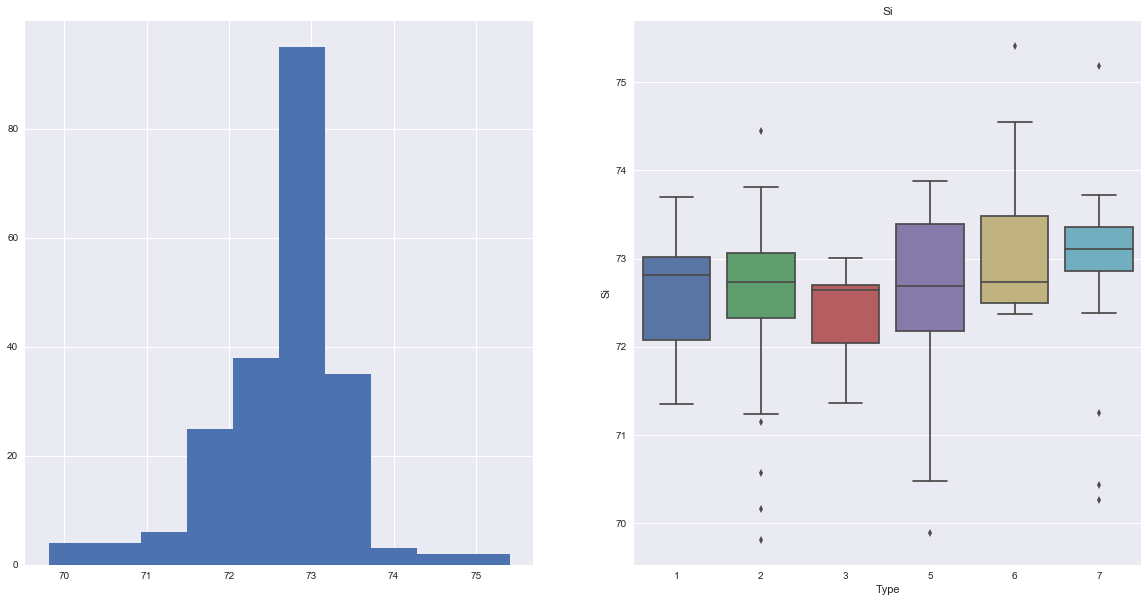

In [9]:
fName = 'Si'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("Si")

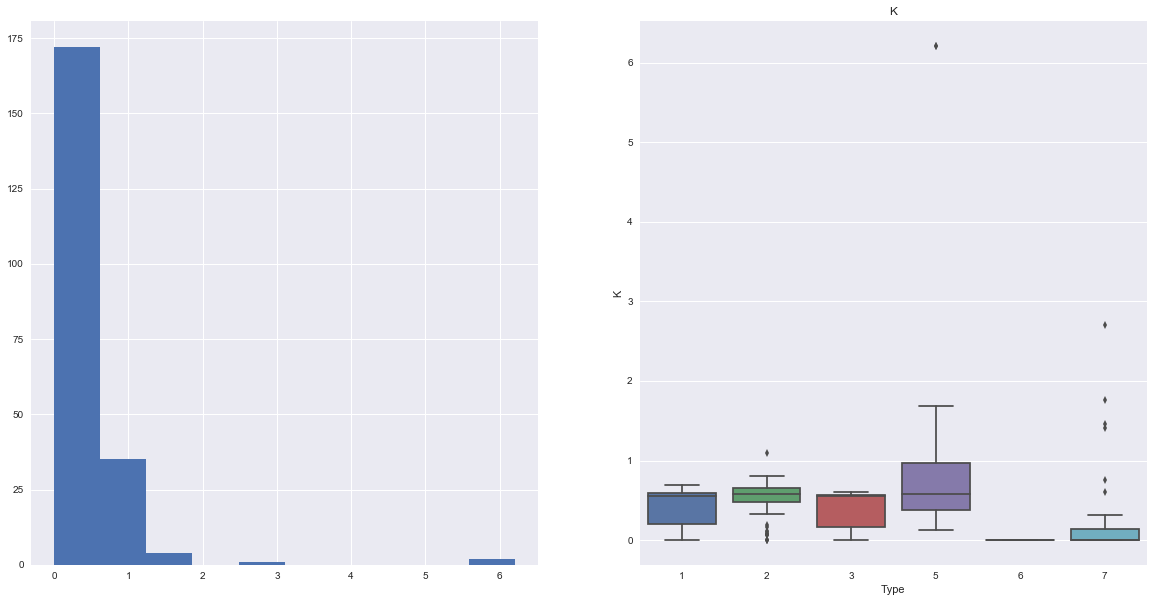

In [10]:
fName = 'K'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("K")

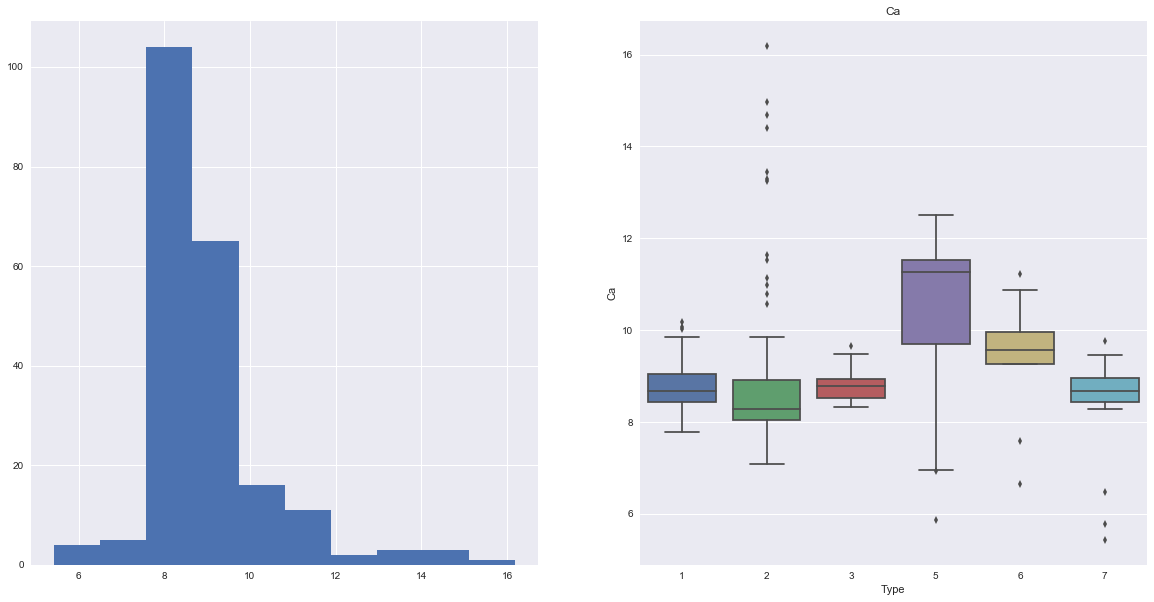

In [11]:
fName = 'Ca'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("Ca")

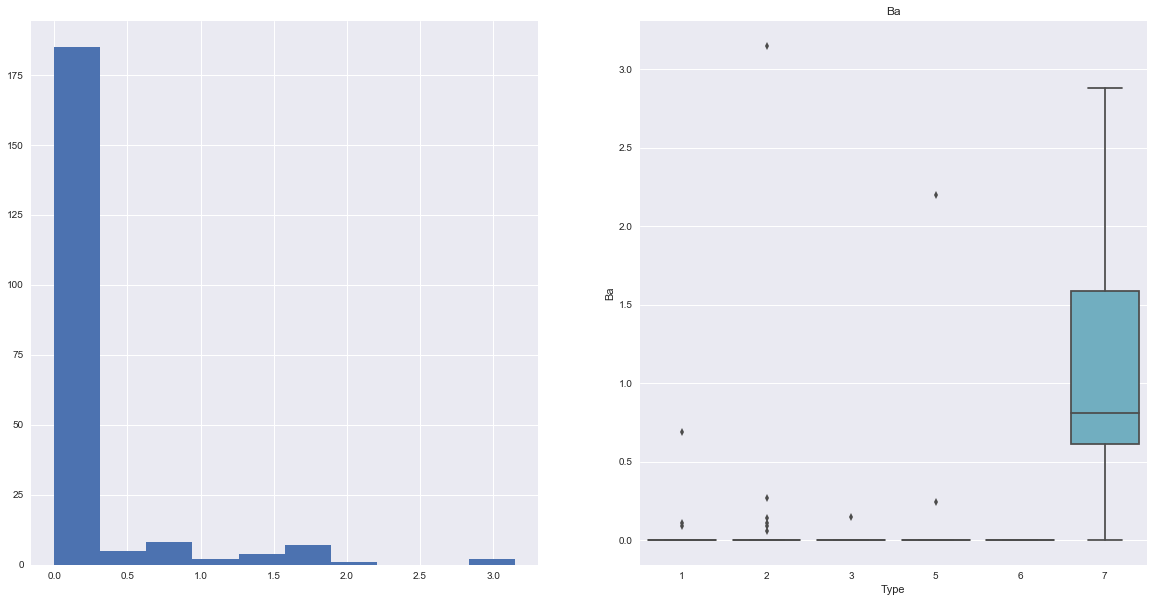

In [12]:
fName = 'Ba'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("Ba")

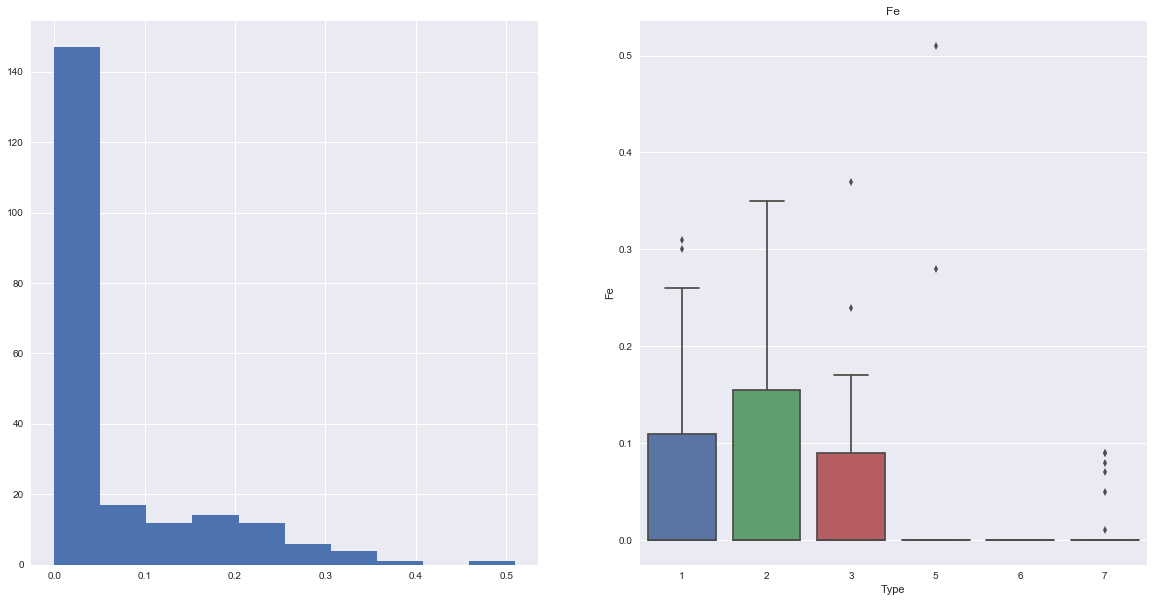

In [13]:
fName = 'Fe'
plt.figure(figsize=[20,10]);
plt.title(fName)
plt.subplot(121);
plt.hist(features[fName],label=y)
plt.subplot(122);
sns.boxplot(y = features[fName],x = y);
plt.title("Fe")

Железо - только 1,2 и 3

Барий - только в 7

Кальций - повышенная концентрация в 5 типе.

Калий практически отсутствует в 6 типе.

Концентрация натрия повышена в образцах 6 и 7 

Магний отсутствует в 7 типе. Много в 1,2,3

Кремний - основной компонент стекла. Вряд ли по нему можно будет что-то выяснить.

Таким образом, виды 5, 6 и 7 легко выделяются. Проверим это.

In [14]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [16]:
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [17]:
def fit(dataset):
    X = dataset.drop('Type', axis = 1);
    y = dataset.Type;
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
    clf.fit(X_train,y_train);
    #print clf.predict(X_test)
    print 'Accuracy is',clf.score(X_test,y_test)
    print 'Feature importance';
    for key, val in zip (features.columns,clf.feature_importances_):
        print key, val

In [18]:
fit(df)

NameError: global name 'clf' is not defined

In [19]:
features['total'] = features.Na+features.Mg+features.Al+features.Si+features.K+features.Ca+features.Ba+features.Fe;

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
clf.fit(X_train,y_train);
print clf.predict(X_test)
print clf.score(X_test,y_test)
for key, val in zip (features.columns,clf.feature_importances_):
    print key, val

[7 1 1 6 2 2 1 2 1 2 2 2 2 2 2 7 2 2 1 2 5 3 7 5 1 1 7 1 2 2 1 1 2 1 3 1 1
 3 1 7 5 6 2 2 2 2 1 2 1 2 1 6 7 1 2 1 1 2 7 1 1 1 1 5 1 2 2 1 1 1 1]
0.661971830986
RI 0.15111008578
Na 0.0262567282272
Mg 0.202186899899
Al 0.174226486532
Si 0.0568302996874
K 0.0739403453689
Ca 0.113722549228
Ba 0.201726605276
Fe 0.0


In [107]:
df2 = df.copy();
df2['total'] = df2.Na+df2.Mg+df2.Al+df2.Si+df2.K+df2.Ca+df2.Ba+df2.Fe;
for feature in df2.columns.drop(['RI','Type','Si','total']):
    # print feature
    df2[feature] = df2[feature]/(df2.total - df2.Si)

df2.head()    

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,total
0,1.52101,0.486448,0.160128,0.039230,71.78,0.002140,0.312054,0.0,0.0,1,99.82
1,1.51761,0.511414,0.132548,0.050074,72.73,0.017673,0.288292,0.0,0.0,1,99.89
2,1.51618,0.505039,0.132512,0.057484,72.99,0.014558,0.290407,0.0,0.0,1,99.78
3,1.51766,0.489622,0.136768,0.047813,72.61,0.021127,0.304670,0.0,0.0,1,99.59
4,1.51742,0.496075,0.135327,0.046355,73.08,0.020561,0.301682,0.0,0.0,1,99.83


In [109]:
fit(df2)

Accuracy is 0.647887323944
Feature importance
RI 0.085463827277
Na 0.0927140803988
Mg 0.202186899899
Al 0.204158459321
Si 0.0474765581908
K 0.0589285714286
Ca 0.107344998208
Ba 0.186475443836
Fe 0.0152511614402


In [174]:
def fit2(dataset):
    X = dataset.drop('Type', axis = 1);
    y = dataset.Type;
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
    plf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False);
    X_train2 = plf.fit_transform(X_train);
    X_test2 = plf.transform(X_test)
    
    clf = tree.DecisionTreeClassifier(random_state = 42)
    clf.fit(X_train2,y_train);
    #print clf.predict(X_test)
    print 'Accuracy is',clf.score(X_test2,y_test)
    print 'Feature importance';
    for key, val in zip (plf.get_feature_names(),clf.feature_importances_):
        print key, val

In [175]:
fit2(df2)

Accuracy is 0.676056338028
Feature importance
x0 0.0170068027211
x1 0.0663224813735
x2 0.0
x3 0.0274376417234
x4 0.0266599909612
x5 0.0160349854227
x6 0.0
x7 0.0
x8 0.0
x0^2 0.0289199676478
x0 x1 0.0
x0 x2 0.0
x0 x3 0.0233843537415
x0 x4 0.0
x0 x5 0.0
x0 x6 0.0093537414966
x0 x7 0.0
x0 x8 0.0
x1^2 0.0
x1 x2 0.0
x1 x3 0.0179932631968
x1 x4 0.0698635406544
x1 x5 0.0
x1 x6 0.0
x1 x7 0.0
x1 x8 0.0
x2^2 0.00815111758989
x2 x3 0.0
x2 x4 0.015731292517
x2 x5 0.0483276643991
x2 x6 0.141692403458
x2 x7 0.0
x2 x8 0.0
x3^2 0.0093537414966
x3 x4 0.0
x3 x5 0.0318027210884
x3 x6 0.100833702087
x3 x7 0.0
x3 x8 0.0172420634921
x4^2 0.0346088435374
x4 x5 0.0
x4 x6 0.0584453743232
x4 x7 0.0
x4 x8 0.0
x5^2 0.0
x5 x6 0.0443588632364
x5 x7 0.0
x5 x8 0.0
x6^2 0.0
x6 x7 0.186475443836
x6 x8 0.0
x7^2 0.0
x7 x8 0.0
x8^2 0.0


In [178]:
def fit3(dataset):
    from sklearn.neighbors import KNeighborsClassifier
    X = dataset.drop('Type', axis = 1);
    y = dataset.Type;
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=0);
    plf = PolynomialFeatures(degree=1, interaction_only=False, include_bias=False);
    X_train2 = plf.fit_transform(X_train);
    X_test2 = plf.transform(X_test)
    
    clf = KNeighborsClassifier();
    clf.fit(X_train2,y_train);
    #print clf.predict(X_test)
    print 'Accuracy is',clf.score(X_test2,y_test)
    print 'Feature importance';
    for key, val in zip (plf.get_feature_names(),clf.feature_importances_):
        print key, val

In [179]:
fit3(df2)

Accuracy is 0.661971830986
Feature importance


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [166]:
fit(df2)

Accuracy is 0.647887323944
Feature importance
RI 0.0948175687736
Na 0.0740065974056
Mg 0.192833158403
Al 0.160195874287
Si 0.0961160139732
K 0.0729591836735
Ca 0.107344998208
Ba 0.186475443836
Fe 0.0152511614402


In [23]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


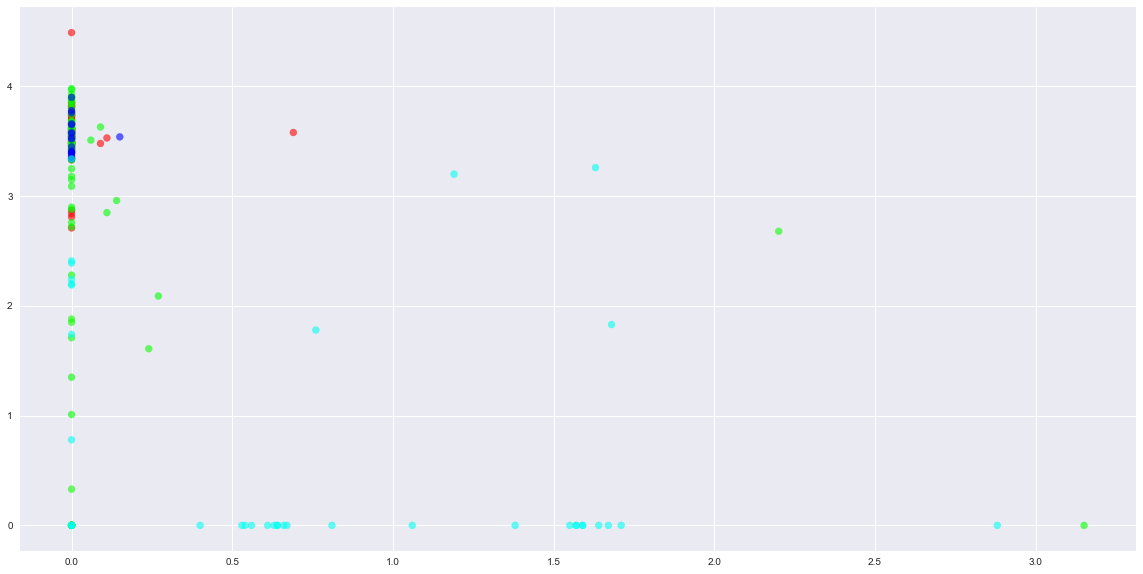

In [209]:
plt.figure(figsize=[20,10])
cm_bright = ListedColormap(['#FF0000', '#00FF00','#0000FF','#FFF000','#0FFF00','#00FFF0'])
plt.scatter(df.Ba,df.Mg,c=df.Type,cmap=cm_bright, alpha=0.6)

Железо - только 1,2 и 3

Барий - только в 7

Кальций - повышенная концентрация в 5 типе.

Калий практически отсутствует в 6 типе.

Концентрация натрия повышена в образцах 6 и 7 

Магний отсутствует в 7 типе. Много в 1,2,3

Кремний - основной компонент стекла. Вряд ли по нему можно будет что-то выяснить.

Таким образом, виды 5, 6 и 7 легко выделяются. Проверим это.

## Try CatBoost

In [21]:
from catboost import Pool, CatBoostClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(features, y-1, test_size=0.33, random_state=0)
trainPool = Pool(X_train,y_train)
testPool  = Pool(X_test,y_test)

In [41]:
clf = CatBoostClassifier(verbose=True,iterations=1000, classes_count=7, loss_function="MultiClass")
clf.fit(trainPool)

Borders for float features generated
0:	learn -1.912536208	total: 34.8ms	remaining: 34.7s
1:	learn -1.881397628	total: 64ms	remaining: 31.9s
2:	learn -1.843780711	total: 91.9ms	remaining: 30.6s
3:	learn -1.812338259	total: 119ms	remaining: 29.7s
4:	learn -1.778834359	total: 155ms	remaining: 30.8s
5:	learn -1.745018627	total: 184ms	remaining: 30.4s
6:	learn -1.717184319	total: 211ms	remaining: 29.9s
7:	learn -1.695255704	total: 242ms	remaining: 30s
8:	learn -1.668935547	total: 269ms	remaining: 29.6s
9:	learn -1.642330123	total: 293ms	remaining: 29s
10:	learn -1.622568581	total: 317ms	remaining: 28.5s
11:	learn -1.595835406	total: 345ms	remaining: 28.4s
12:	learn -1.576352623	total: 371ms	remaining: 28.1s
13:	learn -1.559193381	total: 395ms	remaining: 27.8s
14:	learn -1.537696207	total: 419ms	remaining: 27.5s
15:	learn -1.513011263	total: 449ms	remaining: 27.6s
16:	learn -1.495449365	total: 477ms	remaining: 27.6s
17:	learn -1.475018283	total: 501ms	remaining: 27.3s
18:	learn -1.457947363

In [51]:
y_pr = clf.predict(testPool)[:,0]

In [53]:
np.array(y_pr)-np.array(y_test)

array([ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0., -1., -1.,
        0.,  0.,  0., -1.,  1.,  0., -1.,  0., -1.,  0.,  0., -1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -2.,  0., -2., -1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        0.,  0.,  0.,  0.,  0.,  1.,  0., -2., -2.,  0.,  0.,  0.,  0.,
        0., -1.,  0.,  0.,  2.,  0.])

In [54]:
np.array(y_test)

array([6, 0, 1, 5, 4, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 6, 1, 0, 2, 2, 4, 1, 6,
       6, 1, 0, 6, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 6, 1, 5, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 6, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0], dtype=int64)